In [ ]:
from google.colab import drive
drive.mount('/drive')
%cd /drive

Mounted at /drive
/drive


In [ ]:
import os
os.chdir('/drive/My Drive/Text Mining')

In [ ]:
## Gerekli kütüphaneleri import ettik
## NLTK ve TextBlob doğal dil işleme içindir.
## Wordcloud, seaborn ve matplotlib veri görüntüleme için
## Ayrıca istatistikler için scipy 
import pandas as pd
import numpy as np
import scipy.stats as stats
import nltk
from textblob import TextBlob
from wordcloud import WordCloud

% matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

import seaborn as sns

In [ ]:
df = pd.read_csv('new_df.csv')
df = df.drop('Unnamed: 0', 1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [ ]:
## Test
height_sex_df = df[['height', 'sex']]
male_height = height_sex_df[height_sex_df.sex=='m']
female_height = height_sex_df[height_sex_df.sex=='f']
stats.ttest_ind(male_height['height'].dropna(), female_height['height'].dropna())

Ttest_indResult(statistic=226.89713194246244, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


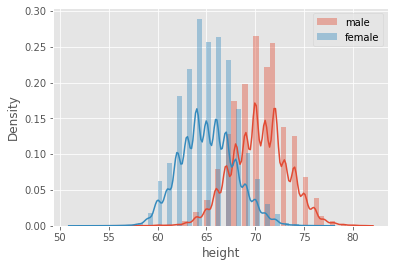

In [ ]:
## Seaborn ile görselleştirme
sns.distplot(male_height['height'].dropna(), label='male')
sns.distplot(female_height['height'].dropna(), label='female')
plt.legend()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ec14f9b10>],
      dtype=object)

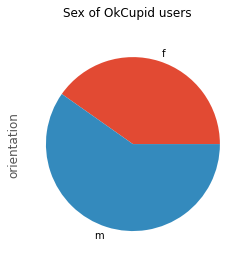

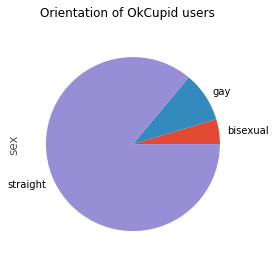

In [ ]:
## Flört havuzu ne şekilde oluşturulur?
## Kadından çok erkek kullanıcı mı var?
## Kişilerin yönelimleri neler?
df[['sex','orientation']].groupby('sex').count().plot.pie(legend=False, title='Sex of OkCupid users', subplots=True)
df[['sex','orientation']].groupby('orientation').count().plot.pie(legend=False, title='Orientation of OkCupid users', subplots=True)

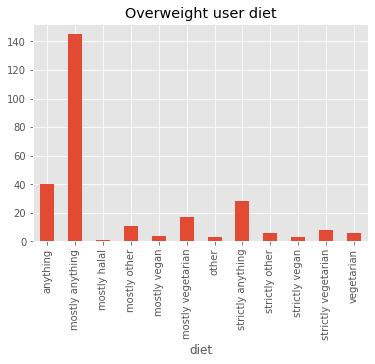

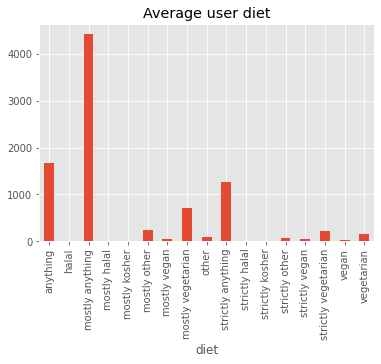

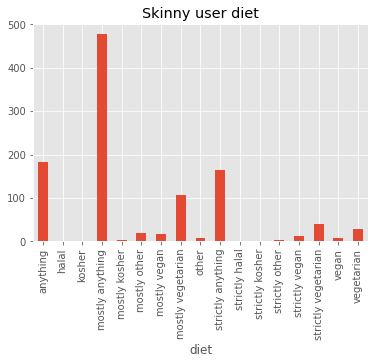

In [ ]:
## değişkenler arasındaki ilişkiler nelerdir?
## vücut tipi ve diyet ne şekilde olmalıdır?

## Karşılaştıracağız: fazla kilolu, ortalama veya sıska
df[['body_type', 'diet']].loc[df.body_type == 'overweight'].groupby('diet').count().plot.bar(title='Overweight user diet', legend=False)
df[['body_type', 'diet']].loc[df.body_type == 'average'].groupby('diet').count().plot.bar(title='Average user diet', legend=False)
df[['body_type', 'diet']].loc[df.body_type == 'skinny'].groupby('diet').count().plot.bar(title='Skinny user diet', legend=False)

In [ ]:
##Test
stats.ttest_ind(male_income['income'].dropna(), female_income['income'].dropna())

Ttest_indResult(statistic=5.621431363151034, pvalue=1.940404446313786e-08)

In [ ]:
## Her iki cinsiyet için de ortalama gelir elde etme
print("Male average income: ", ('%.2f' % male_income['income'].mean()),
      '±', ('%.2f' % male_income['income'].std()))
print("Female average income: ", ('%.2f' % female_income['income'].mean()),
     '±', ('%.2f' % female_income['income'].std()))

Male average income:  102391.22 ± 185983.17
Female average income:  80293.23 ± 173460.13


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


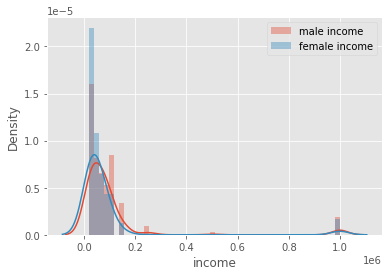

In [ ]:
sns.distplot(male_income['income'].dropna(), label='male income')
sns.distplot(female_income['income'].dropna(), label='female income')
plt.legend()

In [ ]:
## Erkek essayleri ve kadın essayleri listesi oluşturma. 

all_men_essays = []
men = df[df.sex == 'm']
for essay in men['essay0']:
    all_men_essays.append(essay)
for essay in men['essay1']:
    all_men_essays.append(essay)
for essay in men['essay2']:
    all_men_essays.append(essay)
for essay in men['essay3']:
    all_men_essays.append(essay)
for essay in men['essay4']:
    all_men_essays.append(essay)
for essay in men['essay5']:
    all_men_essays.append(essay)
for essay in men['essay6']:
    all_men_essays.append(essay)
for essay in men['essay7']:
    all_men_essays.append(essay)
for essay in men['essay8']:
    all_men_essays.append(essay)
for essay in men['essay9']:
    all_men_essays.append(essay)    
all_men_essays = [x for x in all_men_essays if str(x) != 'nan']
all_men_essays = ' '.join(all_men_essays)

all_women_essays = []
women = df[df.sex == 'f']
for essay in women['essay0']:
    all_women_essays.append(essay)
for essay in women['essay1']:
    all_women_essays.append(essay)
for essay in women['essay2']:
    all_women_essays.append(essay)
for essay in women['essay3']:
    all_women_essays.append(essay)
for essay in women['essay4']:
    all_women_essays.append(essay)
for essay in women['essay5']:
    all_women_essays.append(essay)
for essay in women['essay6']:
    all_women_essays.append(essay)
for essay in women['essay7']:
    all_women_essays.append(essay)
for essay in women['essay8']:
    all_women_essays.append(essay)
for essay in women['essay9']:
    all_women_essays.append(essay)
all_women_essays = [x for x in all_women_essays if str(x) != 'nan']
all_women_essays = ' '.join(all_women_essays)

In [ ]:
#Cinsiyete göre tekrarlanan kelimeler

all_men_words = all_men_essays.split()
men_freq = nltk.FreqDist(all_men_words)
men_freq = men_freq.most_common(500)

all_women_words = all_women_essays.split()
women_freq = nltk.FreqDist(all_women_words)
women_freq = women_freq.most_common(500)

men_women_df = pd.concat([pd.DataFrame(men_freq)[0], pd.DataFrame(women_freq)[0]], axis=1)
men_women_df.columns = ['men', 'women']
men_women_df.head(15)

,men,women
0,i,i
1,and,and
2,the,the
3,to,to
4,a,a
5,of,my
6,my,of
7,in,in
8,i'm,i'm
9,you,with


In [ ]:
## Burada ilk 500 kelimeyi alacağız ve benzersiz olanı bulacağız (her cinsiyet için)

men = pd.DataFrame(men_freq)[0]
women = pd.DataFrame(women_freq)[0]

unique_men = list(set(men) - set(women))
unique_women = list(set(women) - set(men))

unique_df = pd.concat([pd.DataFrame(unique_men), pd.DataFrame(unique_women)], axis=1)
unique_df.columns = ['unique_men', 'unique_women']
unique_df.head(15)

,unique_men,unique_women
0,bar,mad
1,business,laugh.
2,woman,"hiking,"
3,found,passion
4,type,;)
5,computer,crazy
6,more.,adventure
7,does,dating
8,do.,kids
9,away,family.


Text(0.5, 1.0, 'Unique words for Men vs. Women')

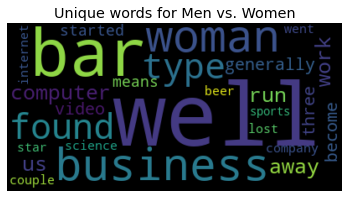

In [ ]:
men_wordcloud = WordCloud().generate(' '.join(unique_men))
plt.imshow(men_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for Men vs. Women")

Text(0.5, 1.0, 'Unique words for Women vs. Men')

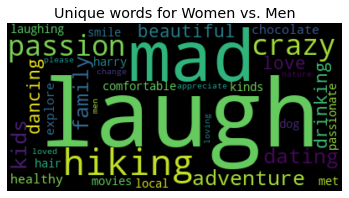

In [ ]:
women_wordcloud = WordCloud().generate(' '.join(unique_women))
plt.imshow(women_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for Women vs. Men")

In [ ]:
## Üniversite mezunları ile ilgili essay karşılaştırması

space_camp_grads = df[df.education == 'graduated from space camp']
all_space_camp_essays = []

for essay in space_camp_grads['essay0']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay1']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay2']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay3']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay4']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay5']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay6']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay7']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay8']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay9']:
    all_space_camp_essays.append(essay)
    
all_space_camp_essays = [x for x in all_space_camp_essays if str(x) != 'nan']
all_space_camp_essays = ' '.join(all_space_camp_essays)

college_grads = df[df.education == 'graduated from college/university']
all_college_grad_essays = []

for essay in college_grads['essay0']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay1']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay2']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay3']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay4']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay5']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay6']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay7']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay8']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay9']:
    all_college_grad_essays.append(essay)
    
all_college_grad_essays = [x for x in all_college_grad_essays if str(x) != 'nan']
all_college_grad_essays = ' '.join(all_college_grad_essays)

In [ ]:
## Uzay kampı arasında deneme karşılaştırması (mezunlar ve üniversite mezunları) (ilk 500 kelime karşılaştırması)

all_space_words = all_space_camp_essays.split()
space_freq = nltk.FreqDist(all_space_words)
space_freq = space_freq.most_common(500)

all_college_words = all_college_grad_essays.split()
college_freq = nltk.FreqDist(all_college_words)
college_freq = college_freq.most_common(500)

space = pd.DataFrame(space_freq)[0]
college = pd.DataFrame(college_freq)[0]

unique_space = list(set(space) - set(college))
unique_college = list(set(college) - set(space))

unique_df = pd.concat([pd.DataFrame(unique_space), pd.DataFrame(unique_college)], axis=1)
unique_df.columns = ['unique_space', 'unique_college']
unique_df.head(15)

,unique_space,unique_college
0,woman,bar
1,said,mad
2,private,laugh.
3,does,fan
4,do.,games
5,;),2.
6,5,hang
7,crazy,spending
8,typical,adventure
9,us,work.


Text(0.5, 1.0, 'Unique words for Space camp grads vs. College grads')

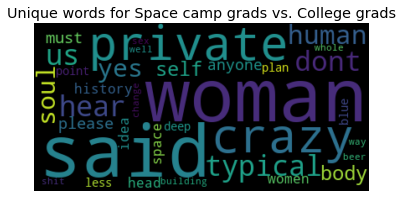

In [ ]:
space_wordcloud = WordCloud().generate(' '.join(unique_space))
plt.imshow(space_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for Space camp grads vs. College grads")

Text(0.5, 1.0, 'Unique words for College grads vs Space camp grads')

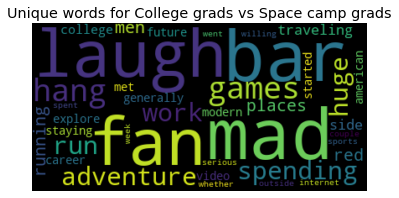

In [ ]:
college_wordcloud = WordCloud().generate(' '.join(unique_college))
plt.imshow(college_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for College grads vs Space camp grads")

In [ ]:
high_school_drop = df[df.education == 'dropped out of high school']
all_dropout_essays = []

for essay in high_school_drop['essay0']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay1']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay2']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay3']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay4']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay5']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay6']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay7']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay8']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay9']:
    all_dropout_essays.append(essay)
    
all_dropout_essays = [x for x in all_dropout_essays if str(x) != 'nan']
all_dropout_essays = ' '.join(all_dropout_essays)

phd_grads = df[df.education == 'graduated from ph.d program']
all_phd_essays = []

for essay in phd_grads['essay0']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay1']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay2']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay3']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay4']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay5']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay6']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay7']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay8']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay9']:
    all_phd_essays.append(essay)
    
all_phd_essays = [x for x in all_phd_essays if str(x) != 'nan']
all_phd_essays = ' '.join(all_phd_essays)

In [ ]:
## okulu bırakanlar ve doktora mezunları karşılaştırması

all_dropout_words = all_dropout_essays.split()
dropout_freq = nltk.FreqDist(all_dropout_words)
dropout_freq = dropout_freq.most_common(500)

all_phd_words = all_phd_essays.split()
phd_freq = nltk.FreqDist(all_college_words)
phd_freq = phd_freq.most_common(500)

dropout = pd.DataFrame(dropout_freq)[0]
phd = pd.DataFrame(phd_freq)[0]

unique_dropout = list(set(dropout) - set(phd))
unique_phd = list(set(phd) - set(dropout))

unique_df = pd.concat([pd.DataFrame(unique_dropout), pd.DataFrame(unique_phd)], axis=1)
unique_df.columns = ['unique_dropout', 'unique_phd']
unique_df.head(15)

,unique_dropout,unique_phd
0,comedy,between
1,dead,coffee
2,computer,business
3,walk,although
4,moment,may
5,came,work.
6,you'll,dinner
7,ass,well.
8,here.,"life,"
9,thought,talking


Text(0.5, 1.0, 'Unique words for High school dropouts vs Ph.D grads')

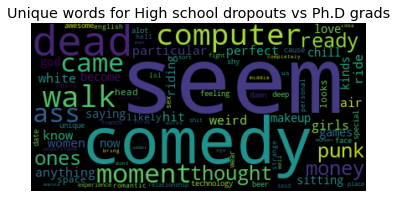

In [ ]:
dropout_wordcloud = WordCloud().generate(' '.join(unique_dropout))
plt.imshow(dropout_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for High school dropouts vs Ph.D grads")


Text(0.5, 1.0, 'Unique words for Ph.D grads vs. High school dropouts')

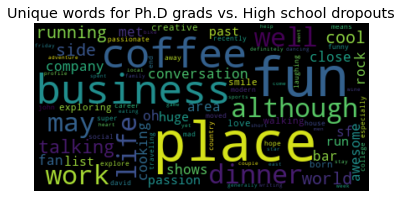

In [ ]:
phd_wordcloud = WordCloud().generate(' '.join(unique_phd))
plt.imshow(phd_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for Ph.D grads vs. High school dropouts")